# Diamond Price Prediction

## Introduction About the Data:

#### problem Statement

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. Also, provide them with the best 5 attributes that are most important.

There are 10 independent variable:

- __Id__ : Unique identifier of each diamond.
- __Carat__ : Carat weight of the cubic zirconia.
- __Cut__ : Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
- __Color__ : Colour of the cubic zirconia.With D being the best and J the worst.
- __Clarity__ : Cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- __Depth__ : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- __Table__ : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- __X__ : Length of the cubic zirconia in mm.
- __Y__ : Width of the cubic zirconia in mm.
- __Z__ : Height of the cubic zirconia in mm.

Target Variable

- __Price__ : Price of the diamond.


In [2]:
import pandas as pd

In [3]:
## Data Ingestions Step

df = pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
## check if any null values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no missing values in our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


There are 193,573 datapoints in or dataset with 10 independent features inclusing id and 1 dependent feature which is price. Three of our features are object/categorical and six are numerical.

In [6]:
df = df.drop(labels='id', axis=1)
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


- The average carat size of a diamond in our dataset is 0.79 with a min of .20 and max of 3.5. Also 25% of the diamonds have a carat size of over 1.3.
- The average depth of a diamond is 61.8 with a minimum depth of 52.1 and maximum of 71.6. Also 25% of the diamonds have a depth of over 62.4.
- The average length of a diamond is 5.7mm with a min length of 0mm and a max lenght of 9.65mm. Also 25% of the diamonds have a length of over 6.51mm.
- The average width of a diamond is 5.72mm with a min width of 0mm and a max width of 10.01mm. Also 25% of the diamonds have a width of over 6.51mm.
- The average height of a diamond is 3.53mm with a min height of 0mm and a max height of 31.3mm. Also 25% of the diamonds have a height of over 4.03mm.
- The average price of a diamond is $3696.15 with a min price of $326 and a max price of $18818. Also 25% of the diamonds have a price of over $5408.

In [7]:
## check duplicate records
df.duplicated().sum()

0

There are no duplicate records in our dataset.

In [8]:
## segregate numerical and categorical columns
categorical_columns = df.columns[df.dtypes==object].tolist()
numerical_columns = df.columns[df.dtypes!=object].tolist()
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns: ['cut', 'color', 'clarity']


In [9]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [10]:
for i in categorical_columns:
    print(df[i].value_counts().sort_values(ascending=False),"\n")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64 

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64 

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64 



- There are 5 different cut type with Ideal the most frequent one. Others cuts are based on frequency Premium, Very Good, Good, Fair.
- There are 7 different color type with G the most frequesnt one. Other cuts based on frequency are E, F, H, D, I, J.
- There are 8 different clarity type with SI1 the most frequesnt one.

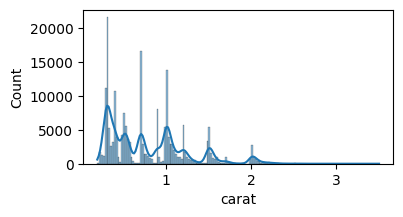

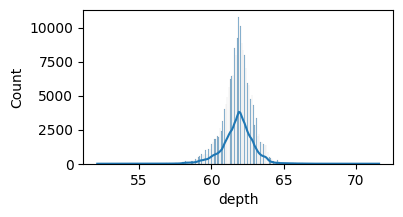

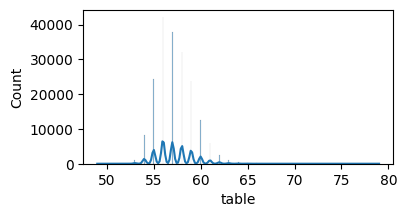

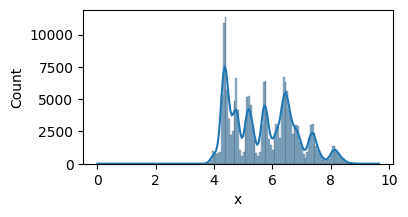

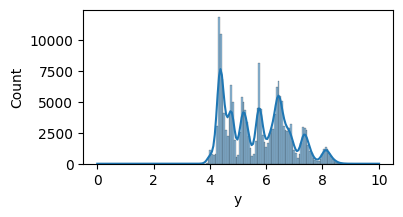

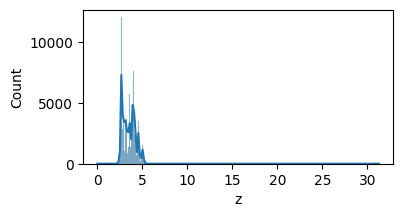

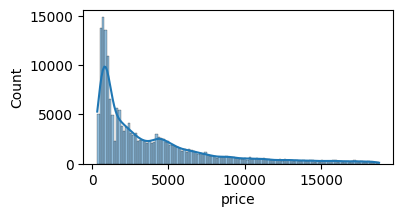

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


for i in numerical_columns:
    plt.figure(figsize=(4,2))
    sns.histplot(data=df,x=i, kde=True)
    plt.show()


<Figure size 400x200 with 0 Axes>

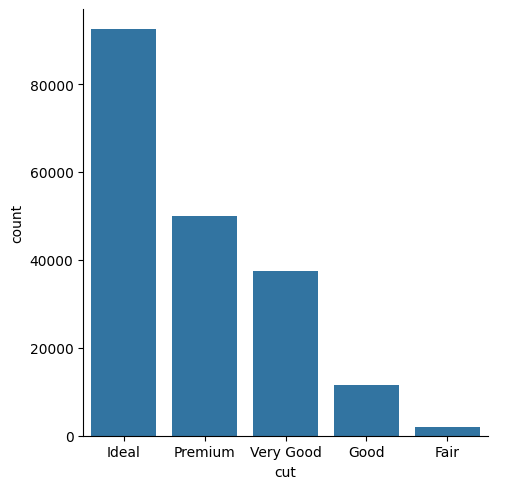

<Figure size 400x200 with 0 Axes>

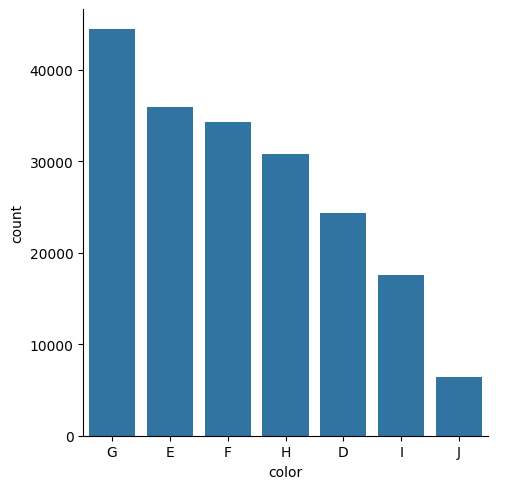

<Figure size 400x200 with 0 Axes>

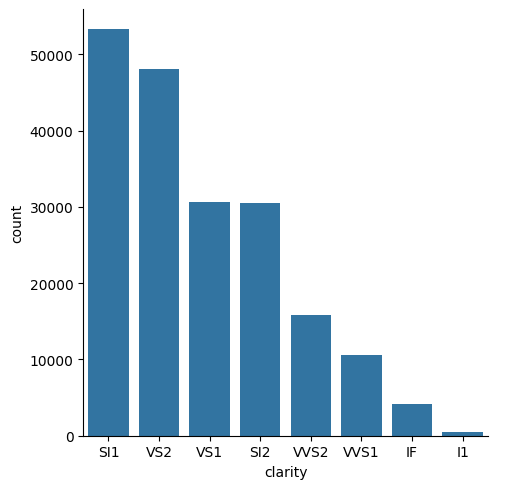

In [14]:
## plotting categorical features

for i in categorical_columns:
    plt.figure(figsize=(4,2))
    sns.catplot(data=df, x=i, kind='count', order=df[i].value_counts().index.tolist())
    plt.show()

<Axes: >

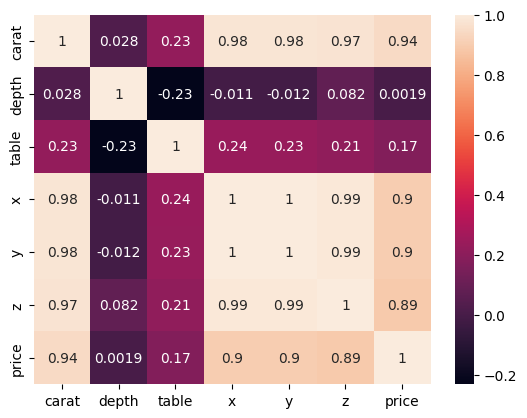

In [15]:
## correlation
sns.heatmap(df[numerical_columns].corr(), annot=True)

We can see a high correlation between x,y,z and also with carat. Therefore we can drop these 3 features x,y,z as this will introduce multicollinearity in our model.

In [16]:
#df.drop(['x','y','z'], axis=1, inplace=True)
#df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [20]:
## creating the ranking of cut, color and clarity
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color_map = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
clarity_map = {'I3':1, 'I2':2, 'I1':3, 'SI2':4, 'SI1':5, 'VS2':6, 'VS1':7, 'VVS2':8, 'VVS1':9, 'IF':10, 'FL':11}

In [32]:
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,6,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,4,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,7,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,7,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,6,62.6,59.0,7.65,7.61,4.77,14453


<Axes: >

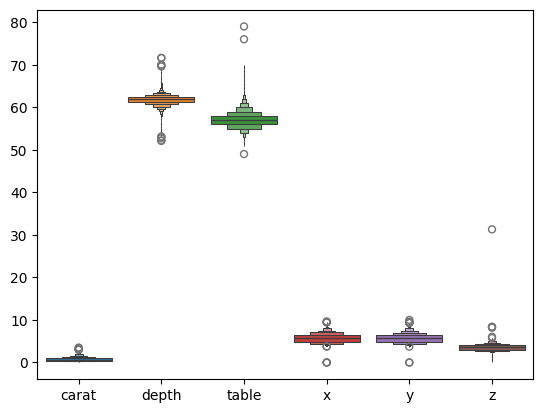

In [37]:
sns.boxenplot(df[numerical_columns[:-1]])